
## 1. Load and Inspect Data

In [5]:
# === Imports ===
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import os

# === Load Data ===
def load_oil_data(path: str) -> pd.DataFrame:
    df = pd.read_csv(path, parse_dates=['Date'], dayfirst=True)
    df.sort_values("Date", inplace=True)
    return df

oil_df = load_oil_data("../data/BrentOilPrices.csv")
oil_df.head()


C:\Users\try\AppData\Local\Temp\ipykernel_8484\276614610.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, parse_dates=['Date'], dayfirst=True)


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


Plot Trend

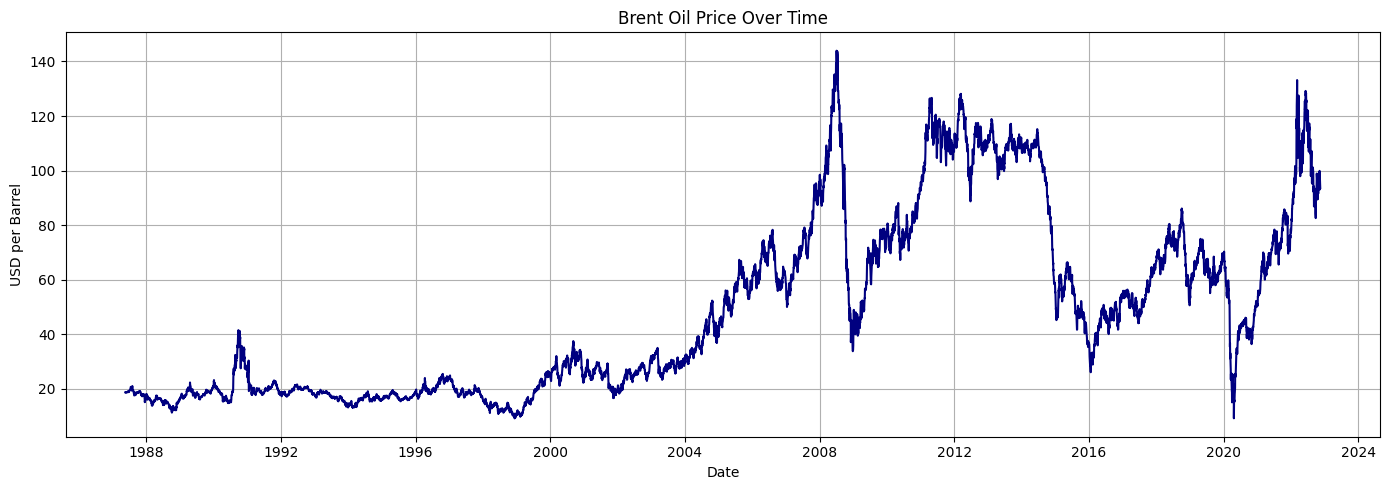

In [6]:
# Plot price over time
plt.figure(figsize=(14, 5))
plt.plot(oil_df["Date"], oil_df["Price"], color='navy')
plt.title("Brent Oil Price Over Time")
plt.xlabel("Date")
plt.ylabel("USD per Barrel")
plt.grid(True)
plt.tight_layout()
plt.show()


Check Stationarity – ADF Test

In [7]:
# Augmented Dickey-Fuller Test
result = adfuller(oil_df['Price'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("✅ Data is stationary")
else:
    print("❌ Data is not stationary")


ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287
❌ Data is not stationary
